Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

Importando o data set

In [4]:
cerveja = pd.read_csv('../data/Consumo_cerveja_1.csv')

Análise exploratória dos dados

Primeiras observações da base de dados.

In [5]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


Últimas Observações

In [6]:
cerveja.tail()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


Dimensão da base de dados: são 365 observações e 7 variáveis.

In [7]:
cerveja.shape

(365, 7)

Validação de observações nulas (NULL)


In [8]:
cerveja.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

Tipo das variáveis.

In [9]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

Tabela descritiva das variáveis

In [10]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Gráfico correlograma

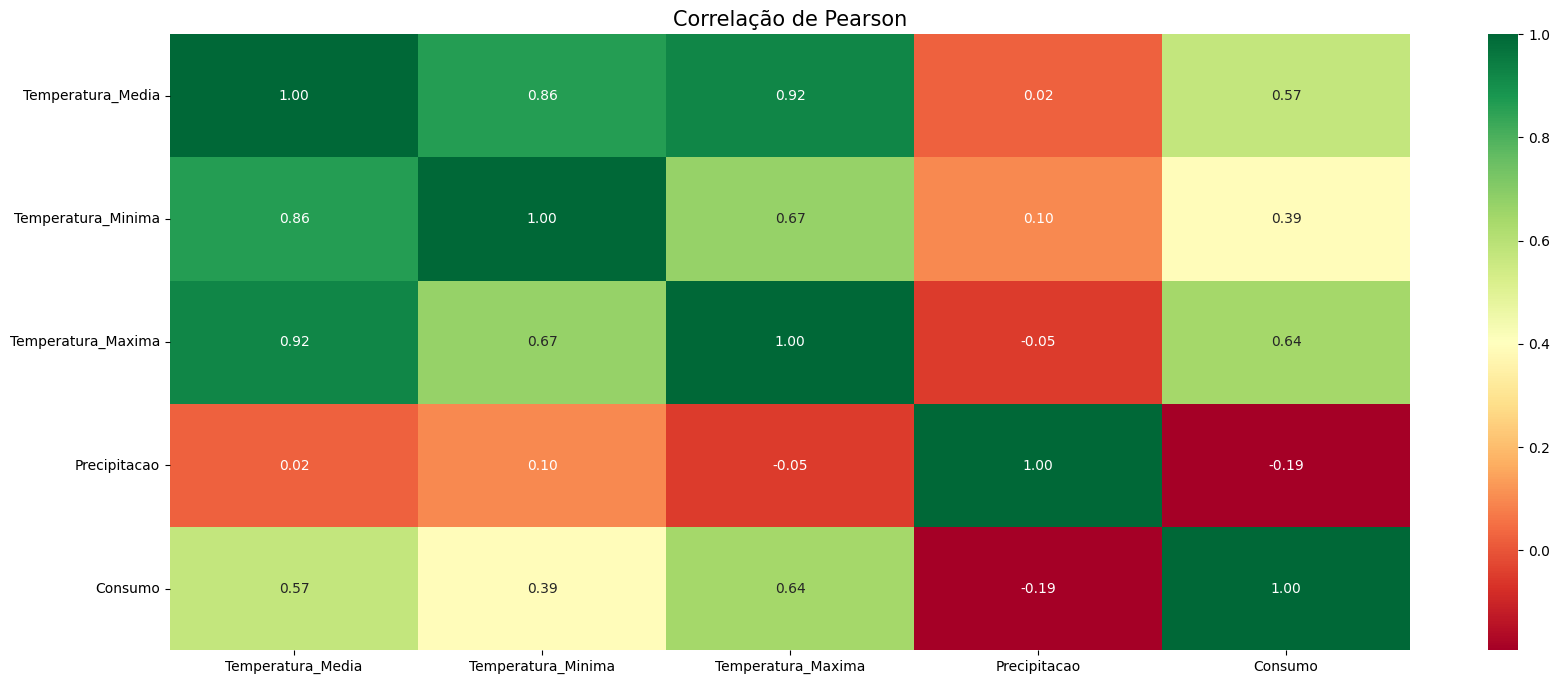

In [11]:
plt.figure(figsize=(20,8))
cerveja_quanti = cerveja[['Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitacao',
       'Consumo']] 
sns.heatmap(cerveja_quanti.corr(),annot=True, cmap="RdYlGn", fmt=".2f");
plt.title('Correlação de Pearson',size=15);

Boxplot:


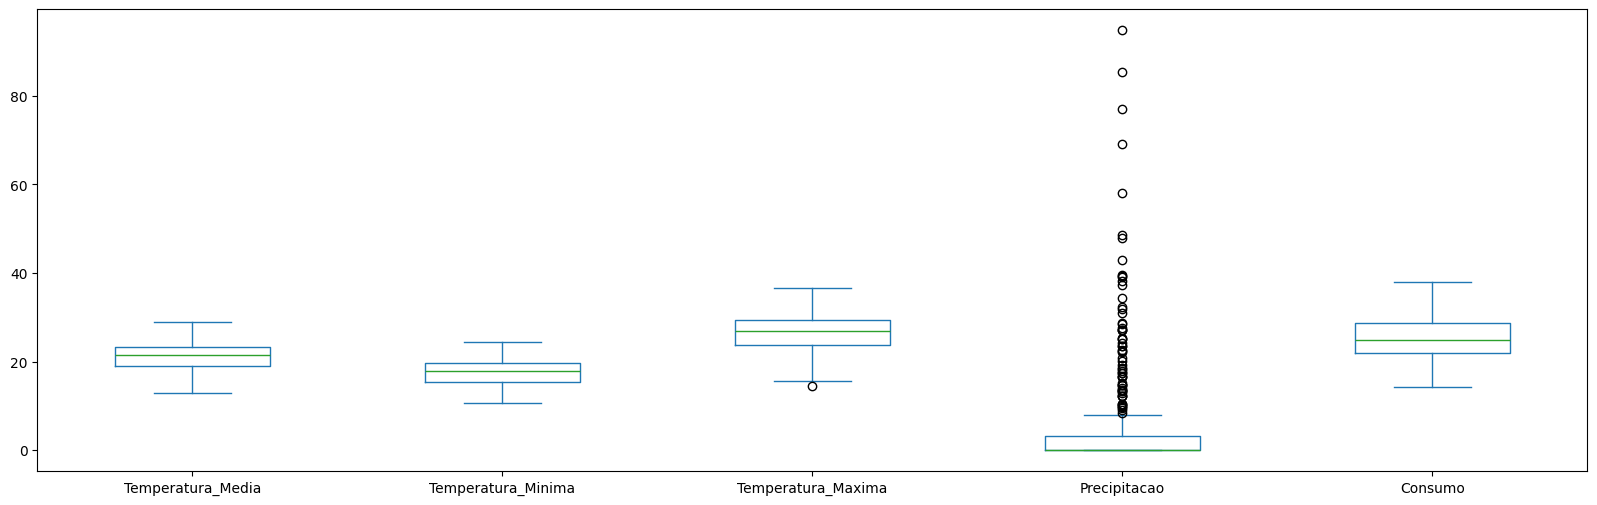

In [12]:
cerveja[['Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitacao',
       'Consumo']].plot.box(figsize=(20,6));

Histograma de variáveis

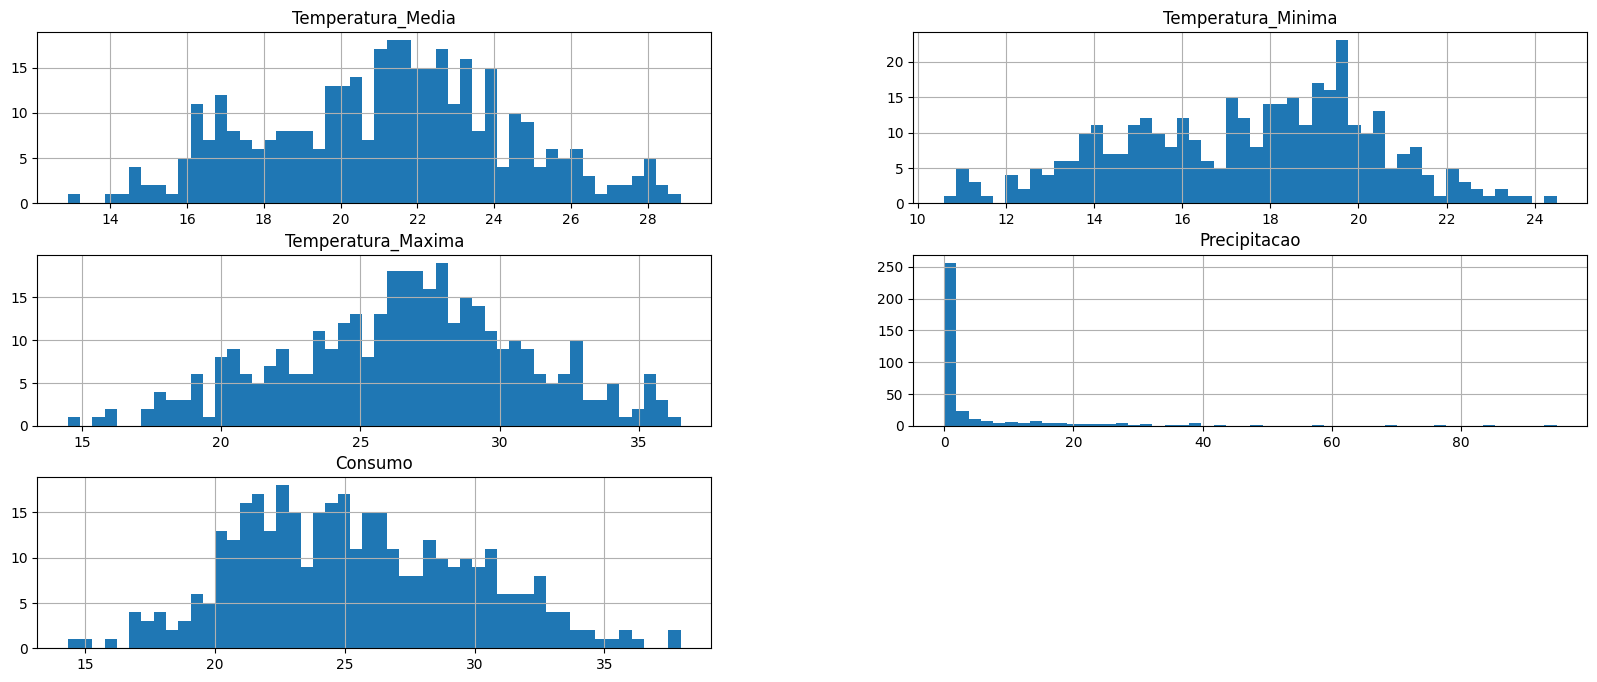

In [13]:
cerveja[['Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitacao',
       'Consumo']].hist(figsize=(20,8), bins=50);

Gráfico de dispersão entre as variáveis

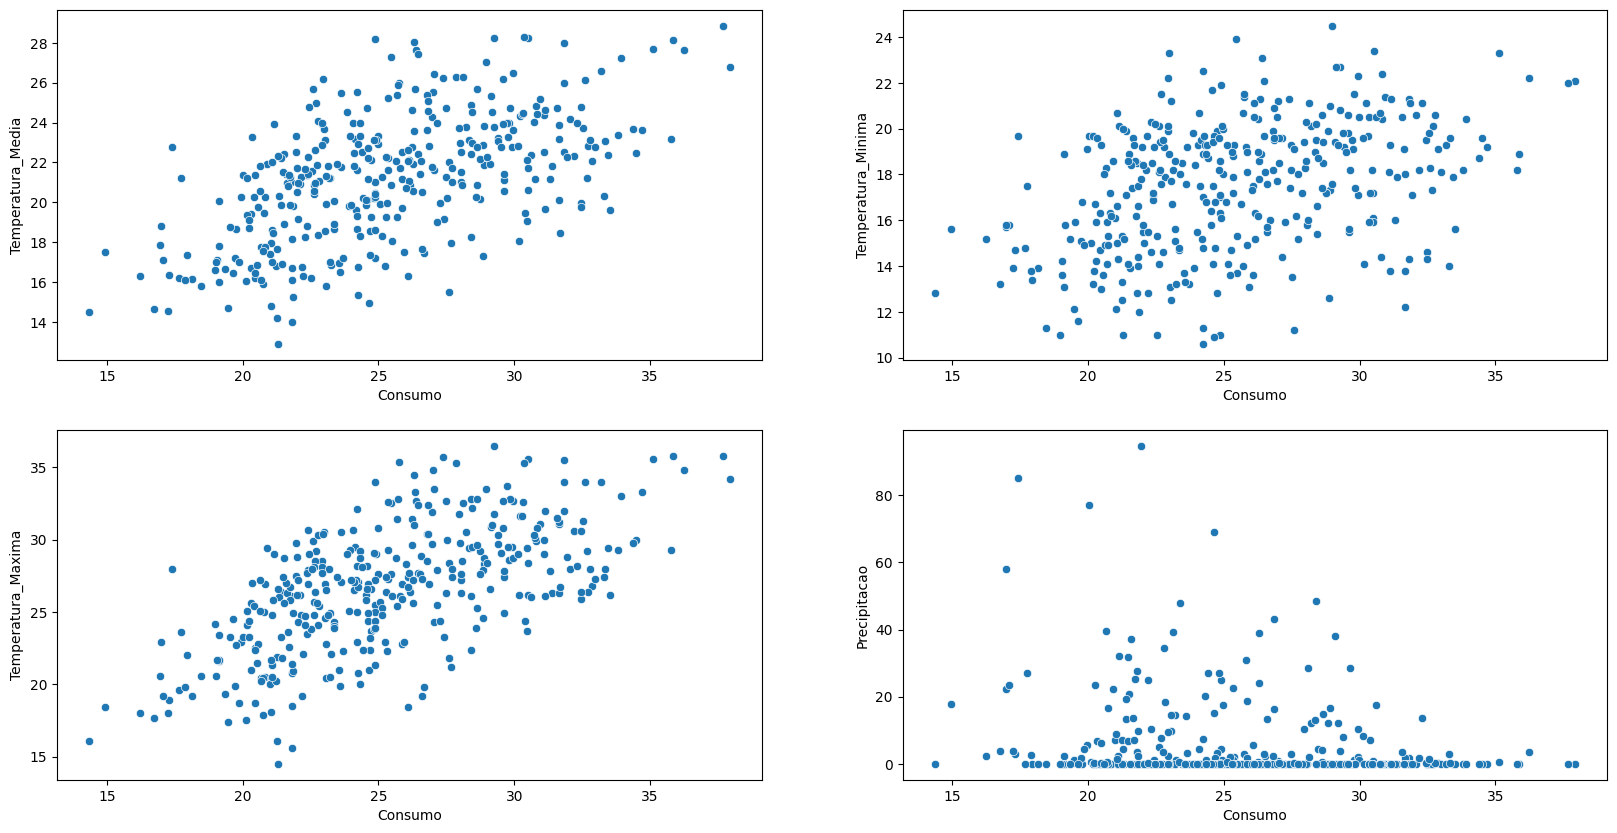

In [14]:
fig,ax = plt.subplots(2,2, figsize=(20,10))
sns.scatterplot(x='Consumo',y='Temperatura_Media',data = cerveja,ax=ax[0][0]);
sns.scatterplot(x='Consumo',y='Temperatura_Minima',data = cerveja,ax=ax[0][1]);
sns.scatterplot(x='Consumo',y='Temperatura_Maxima',data = cerveja,ax=ax[1][0]);
sns.scatterplot(x='Consumo',y='Precipitacao',data = cerveja,ax=ax[1][1]);

Gerando modelos com statsmodels

In [15]:
#Variáveis independentes
X = cerveja.drop(['Consumo','Data'],axis=1)
#Variável dependentes
y = cerveja['Consumo']

In [16]:
X1 = sm.add_constant(X)
X1

,const,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana
0,1.0,27.30,23.9,32.5,0.0,0
1,1.0,27.02,24.5,33.5,0.0,0
2,1.0,24.82,22.4,29.9,0.0,1
3,1.0,23.98,21.5,28.6,1.2,1
4,1.0,23.82,21.0,28.3,0.0,0
...,...,...,...,...,...,...
360,1.0,24.00,21.1,28.2,13.6,1
361,1.0,22.64,21.1,26.7,0.0,0
362,1.0,21.68,20.3,24.1,10.3,0
363,1.0,21.38,19.3,22.4,6.3,0


In [17]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
print(modelo1.summary(title='Sumário do modelo'))

                              Sumário do modelo                               
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.19e-97
Time:                        20:02:15   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4447      0

Análise gráfica de resíduos

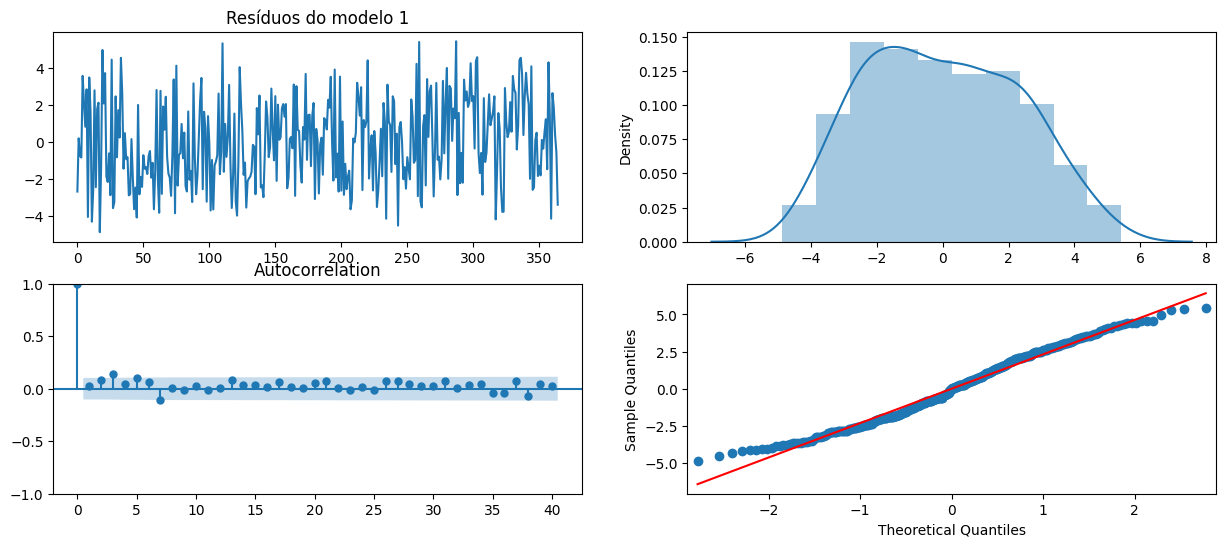

In [18]:
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [19]:
X2 = X.drop(['Temperatura_Media','Temperatura_Minima'],axis=1)

In [20]:
modelo2 = (sm.OLS(y,sm.add_constant(X2)).fit())
modelo2.summary(title='Sumário do modelo')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Sumário do modelo                               
==============================================================================
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Wed, 05 Nov 2025   Prob (F-statistic):          3.85e-100
Time:                        20:02:15   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4321      0.774      8.310      0.000       4.910       7.954
Temperatura_Maxima     0.6685      0.028     23.622      0.000       0.613       0.724
Precipitacao          -0.0575      0.010     -5.847      0.000      -0.077      -0.038
Final_de_Semana        5.1841      0.270     19.200      0.000       4.653       5.715
==============================================================================
Omnibus:                       38.795   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.850
Skew:                           0.153   Prob(JB):                      0.00162
Kurtosis:                       2.133   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

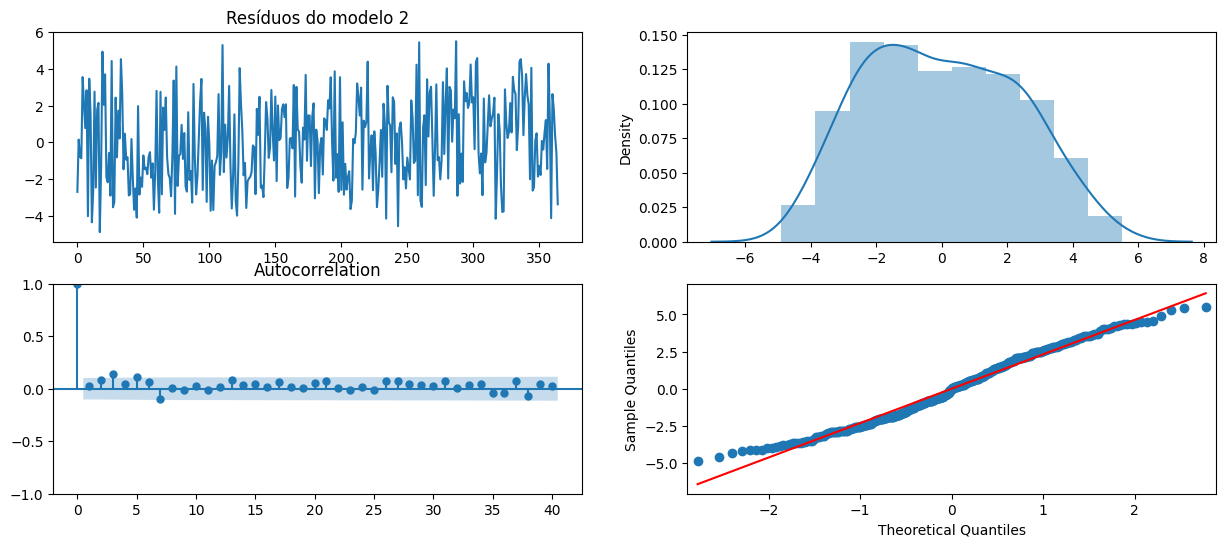

In [21]:
residuos1 = modelo2.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);